### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [5]:
import numpy as np
import pandas as pd
df=pd.read_csv("/workspaces/707-warm-up-assignment-2-mansigopani/data/2019_Yellow_Taxi_Trip_Data.csv",header=0)
df.head #This dataset contains 10000 rows and 18 columns. First 5 rows are displayed. 


<bound method NDFrame.head of       vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  \
0            2  2019-10-23T16:39:42.000  2019-10-23T17:14:10.000   
1            1  2019-10-23T16:32:08.000  2019-10-23T16:45:26.000   
2            2  2019-10-23T16:08:44.000  2019-10-23T16:21:11.000   
3            2  2019-10-23T16:22:44.000  2019-10-23T16:43:26.000   
4            2  2019-10-23T16:45:11.000  2019-10-23T16:58:49.000   
...        ...                      ...                      ...   
9995         1  2019-10-23T17:39:59.000  2019-10-23T17:49:26.000   
9996         1  2019-10-23T17:53:02.000  2019-10-23T18:00:45.000   
9997         1  2019-10-23T17:07:16.000  2019-10-23T17:11:35.000   
9998         1  2019-10-23T17:38:26.000  2019-10-23T17:49:28.000   
9999         1  2019-10-23T17:22:14.000  2019-10-23T17:52:09.000   

      passenger_count  trip_distance  ratecodeid store_and_fwd_flag  \
0                   1           7.93           1                  N   
1          

### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [23]:
df.shape

(10000, 18)

#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [22]:
summary= ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
df[summary].describe()
#amongst these 4 columns, total_amount has highest mean and median



,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 4

Count the number of NAs in each column.

In [24]:
df.isna().sum()
#we do not have any NA's in any columns

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

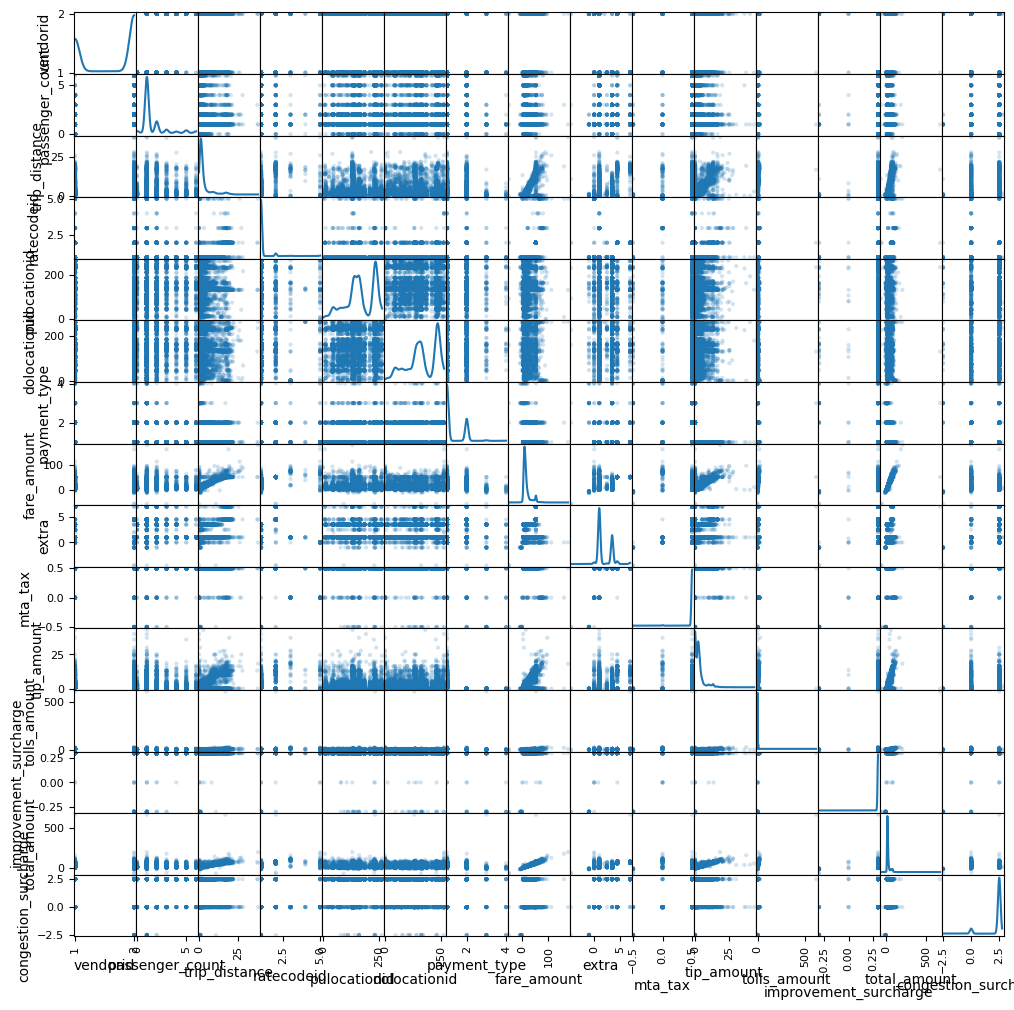

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
drop_variables = df.drop(['vendorid','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'ratecodeid', 'pulocationid', 'dolocationid'], errors='ignore')
plot = scatter_matrix(drop_variables, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()



#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

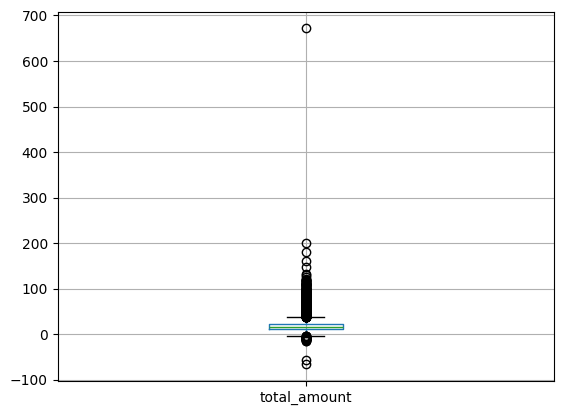

In [13]:
df.boxplot("total_amount")
plt.show()
#Yes, there is one outlier because the datax`` point which is close is 700 is very far from whisker as shown in the boxplot.

#### Exercise 7

Use a linear regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

subset_features = ['trip_distance', 'mta_tax', 'tolls_amount', 'congestion_surcharge', 'vendorid', 'passenger_count', 'trip_distance', 'pulocationid', 'dolocationid', 'payment_type','extra', 'improvement_surcharge']
prediction = 'fare_amount'
x= df[subset_features]
y = df[prediction]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50) 
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 31.679100351010995


#### Exercise 8

Do the same thing you did in 7, but use a decision tree regressor.  Which works better? Why do you think that is?


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

subset_features = ['trip_distance', 'mta_tax', 'tolls_amount', 'congestion_surcharge', 'vendorid', 'passenger_count', 'trip_distance', 'pulocationid', 'dolocationid', 'payment_type','extra', 'improvement_surcharge']
prediction = 'fare_amount'

x = df[subset_features]
y= df[prediction]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=60)

decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)
y_prediction_tree = decision_tree_model.predict(x_test)
mse_Decision = mean_squared_error(y_test, y_prediction_tree)
print(f'Mean Squared Error: {mse_Decision}')
#Since Decision Tree Regressor has lower MSE than the MSE of Linear Regression it might work better for the dataset.

Mean Squared Error: 21.09937474628685
